# Explore here

In [7]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [8]:
from sklearn.model_selection import train_test_split

X = df.copy()
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

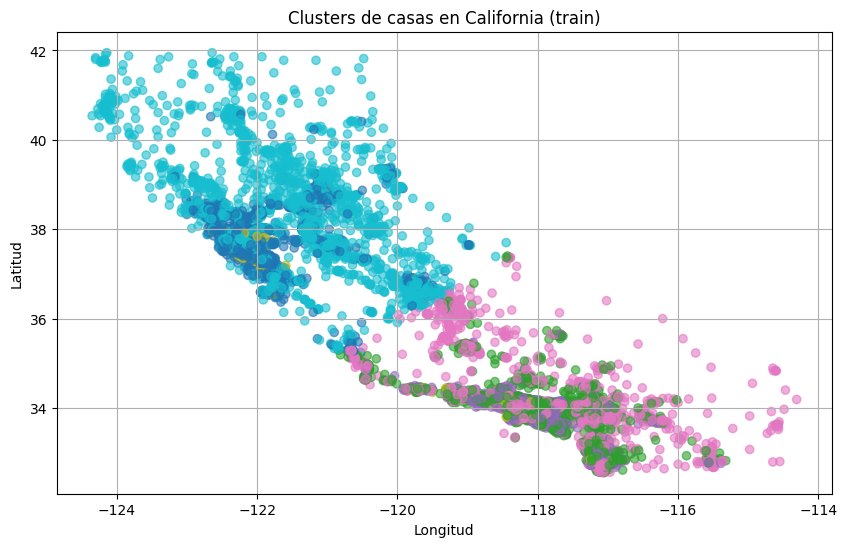

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Entrenar modelo no supervisado
kmeans = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_train)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='tab10', alpha=0.6)
plt.title("Clusters de casas en California (train)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid()
plt.show()


/tmp/ipykernel_2068/2111423313.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='tab10', edgecolor='k', marker='x', label="Test")


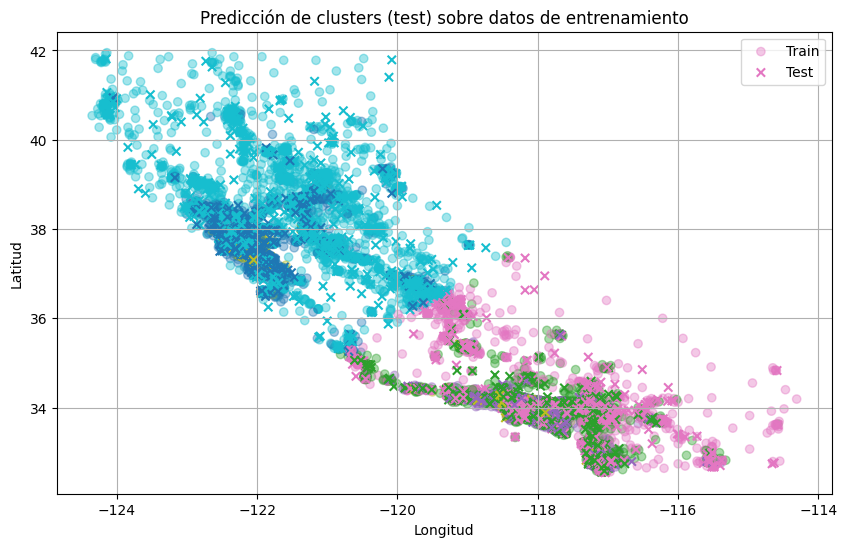

In [10]:
# Predecir clusters para datos nuevos
X_test['cluster'] = kmeans.predict(X_test)

# Mostrar en gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='tab10', alpha=0.4, label="Train")
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='tab10', edgecolor='k', marker='x', label="Test")
plt.title("Predicción de clusters (test) sobre datos de entrenamiento")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid()
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar modelo supervisado para predecir el cluster
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train.drop(columns='cluster'), X_train['cluster'])

# Evaluación
y_pred = clf.predict(X_test.drop(columns='cluster'))
print("Accuracy:", accuracy_score(X_test['cluster'], y_pred))
print(classification_report(X_test['cluster'], y_pred))

Accuracy: 0.9956395348837209
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [12]:
import joblib

joblib.dump(kmeans, "modelo_kmeans.pkl")
joblib.dump(clf, "modelo_randomforest.pkl")

['modelo_randomforest.pkl']